 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns

whale_csv_path = Path('./Resources/whale_returns.csv')
# whale_returns = pd.read_csv("whale_returns.csv", index_col="Date", parse_dates=True)
whale_returns_df = pd.read_csv(whale_csv_path)
whale_returns_df.head()


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:

algo_csv_path = Path('./Resources/algo_returns.csv')
# algo_returns = pd.read_csv("algo_returns.csv", index_col="Date", parse_dates=True)
algo_returns_df = pd.read_csv(algo_csv_path)
algo_returns_df.head()


,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls

algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices

sp500_history_csv_path = Path('./Resources/sp500_history.csv')
# sp500_history = pd.read_csv("sp500_history.csv", index_col="Date", parse_dates=True)
sp500_history_df = pd.read_csv(sp500_history_csv_path)
sp500_history_df.head()



,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [9]:
# Check Data Types
sp500_history_df.dtypes

Date     object
Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history_df.Close = sp500_history_df.Close.str.strip("$")
sp500_history_df.Close = sp500_history_df.Close.astype('float')
sp500_history_df.dtypes
sp500_history_df.dropna(subset=['Close'], inplace=True)
sp500_history_df['Close'] = sp500_history_df['Close'].astype('int')

In [11]:
# Calculate Daily Returns
sp500_history_df['daily_returns'] = sp500_history_df.Close.pct_change()
sp500_history_df.head()

,Date,Close,daily_returns
0,23-Apr-19,2933,NaN
1,22-Apr-19,2907,-0.008865
2,18-Apr-19,2905,-0.000688
3,17-Apr-19,2900,-0.001721
4,16-Apr-19,2907,0.002414


In [12]:
# Drop nulls
sp500_history_df.dropna(inplace=True)
sp500_history_df.isnull().sum()

Date             0
Close            0
daily_returns    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_df.rename(columns = {'daily_returns':'SP500_Returns'},inplace=True)
sp500_history_df.columns

Index(['Date', 'Close', 'SP500_Returns'], dtype='object')

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, sp500_history_df[['SP500_Returns']], algo_returns_df], axis="columns", join="inner",ignore_index=False)
combined_df.sort_index(inplace=True)
combined_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500_Returns,Date,Algo 1,Algo 2
6,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,0.000688,2014-06-05,0.004062,0.013285
7,2015-03-11,0.004012,0.005163,0.003312,-0.001147,-0.006536,2014-06-06,0.001857,0.008284
8,2015-03-12,0.008265,0.010272,0.013117,0.010801,0.000000,2014-06-09,-0.005012,0.005668
9,2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.003463,2014-06-10,0.004406,-0.000735
10,2015-03-16,0.007901,0.003583,0.007953,0.008055,0.005907,2014-06-11,0.004760,-0.003761


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [15]:
# Plot daily returns of all portfolios
import matplotlib.pyplot as plt
import seaborn as sns

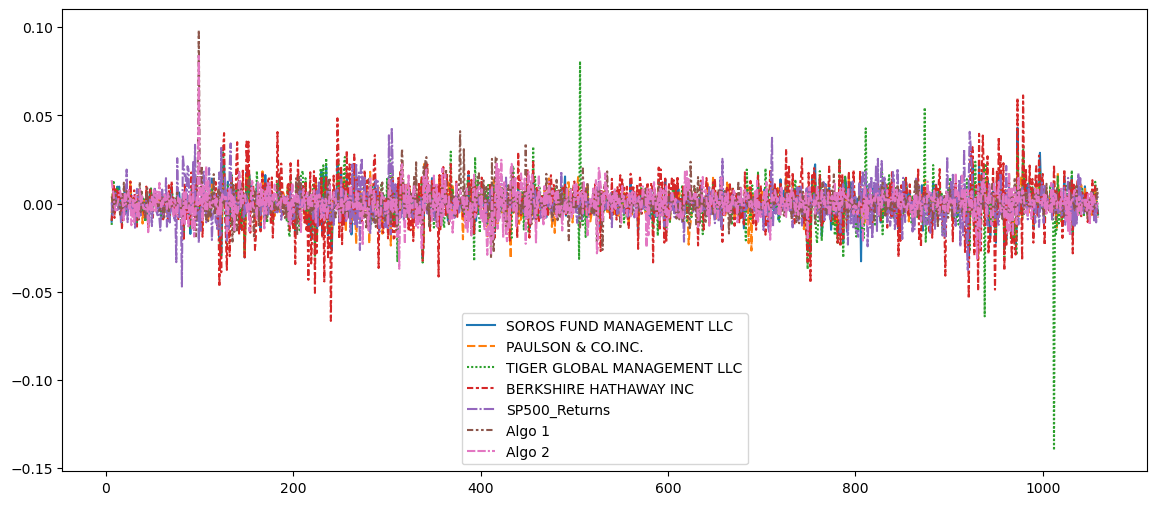

(1054, 9)

In [16]:
fig = plt.figure(figsize=(14,6))
#plt.plot(combined_df)
sns.lineplot(data =combined_df)
plt.legend()
plt.show()

combined_df.shape

#### Calculate and Plot cumulative returns.

<Axes: >

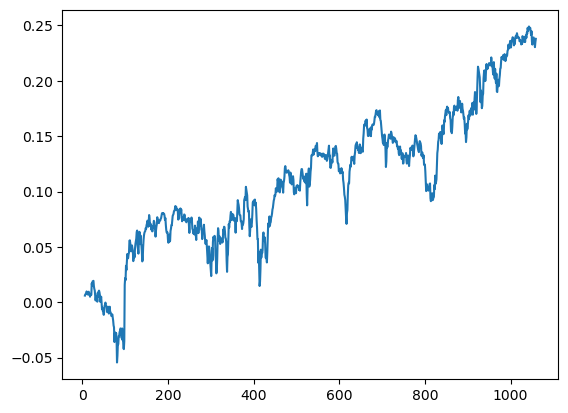

In [17]:
# Calculate cumulative returns of all portfolios
weights =[0.33,0.33,0.33]
portfolio_returns = combined_df[['SP500_Returns', 'Algo 1', 'Algo 2']].dot(weights)
portfolio_returns.head()
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


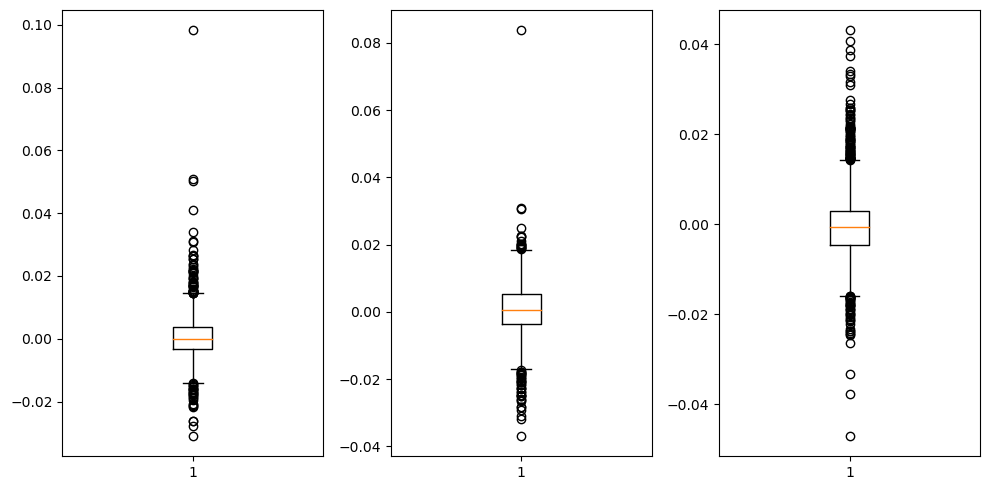

In [18]:
# Box plot to visually show risk
fig,axes = plt.subplots(1,3,figsize=(10,5))
axes[0].boxplot(algo_returns_df[['Algo 1']])
axes[1].boxplot(algo_returns_df[['Algo 2']])
axes[2].boxplot(sp500_history_df[['SP500_Returns']])
plt.tight_layout()
plt.show()

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
std_deviation = combined_df.std()
std_deviation

C:\Users\djurg\AppData\Local\Temp\ipykernel_14876\3129418231.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_deviation = combined_df.std()


SOROS FUND MANAGEMENT LLC      0.007855
PAULSON & CO.INC.              0.006988
TIGER GLOBAL MANAGEMENT LLC    0.010845
BERKSHIRE HATHAWAY INC         0.012850
SP500_Returns                  0.008552
Algo 1                         0.007745
Algo 2                         0.008265
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
snp_std = sp500_history_df.SP500_Returns.std()
snp_std
# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = std_deviation[std_deviation > std_deviation['SP500_Returns']]

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
portfolio_stddev_daily = combined_df.std(axis=0)
trading_days_per_year = 252
portfolio_stddev_annualized = portfolio_stddev_daily * np.sqrt(trading_days_per_year)

print(portfolio_stddev_annualized)

SOROS FUND MANAGEMENT LLC      0.124700
PAULSON & CO.INC.              0.110926
TIGER GLOBAL MANAGEMENT LLC    0.172156
BERKSHIRE HATHAWAY INC         0.203994
SP500_Returns                  0.135763
Algo 1                         0.122946
Algo 2                         0.131206
dtype: float64


C:\Users\djurg\AppData\Local\Temp\ipykernel_14876\3706967382.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  portfolio_stddev_daily = combined_df.std(axis=0)


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

C:\Users\djurg\AppData\Local\Temp\ipykernel_14876\3279945422.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_std_df = combined_df.rolling(window=window_size).std()


<Axes: >

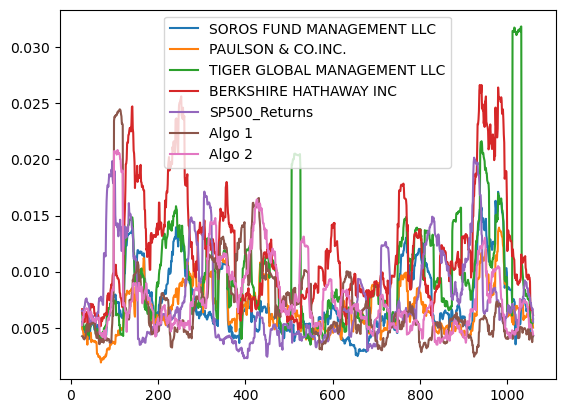

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
window_size = 21
rolling_std_df = combined_df.rolling(window=window_size).std()
rolling_std_df = rolling_std_df.dropna()

# Plot the rolling standard deviation
rolling_std_df.plot()

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
correlation

C:\Users\djurg\AppData\Local\Temp\ipykernel_14876\2812686970.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = combined_df.corr()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500_Returns,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.700191,0.561548,0.754025,-0.036043,-0.013205,-0.003091
PAULSON & CO.INC.,0.700191,1.000000,0.435163,0.545549,-0.020326,-0.030506,-0.026532
TIGER GLOBAL MANAGEMENT LLC,0.561548,0.435163,1.000000,0.424908,0.032427,-0.014538,-0.039470
BERKSHIRE HATHAWAY INC,0.754025,0.545549,0.424908,1.000000,-0.003233,-0.005687,-0.025006
SP500_Returns,-0.036043,-0.020326,0.032427,-0.003233,1.000000,-0.019977,-0.028958
Algo 1,-0.013205,-0.030506,-0.014538,-0.005687,-0.019977,1.000000,0.327996
Algo 2,-0.003091,-0.026532,-0.039470,-0.025006,-0.028958,0.327996,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [24]:
# Calculate covariance of a single portfolio

portfolio_returns = combined_df['SP500_Returns']
portfolio_covariance = portfolio_returns.cov(combined_returns['Daily Return'])

# Calculate variance of S&P 500
sp500_variance = combined_returns['Daily Return'].var()
print(sp500_variance)

# Computing beta
beta = portfolio_covariance / sp500_variance
print("Beta is:", beta)

# Plot beta trend

rolling_window = 60
rolling_beta = portfolio_returns.rolling(window=rolling_window).cov(combined_returns['Daily Return']) / sp500_variance
import seaborn as sns

rolling_window = 60
rolling_beta = portfolio_returns.rolling(window=rolling_window).cov(combined_returns['Daily Return']) / sp500_variance

plt.figure(figsize=(12, 6))
sns.lineplot(data=rolling_beta, color='blue', label=f'Rolling {rolling_window}-Day Beta')
plt.axhline(beta, color='red', linestyle='--', label='Current Beta')
plt.title(f'Rolling {rolling_window}-Day Beta of {portfolio_name} vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'combined_returns' is not defined

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window
window_size = 21
ewma_df = combined_df.ewm(halflife=window_size).mean()
ewma_df.plot(title=f'Rolling {window_size}-Day Average')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios
risk_free_rate = 0.10
sharpe_ratios = (combined_df.mean() - risk_free_rate) / std_deviation
sharpe_ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock
aapl_csv_path = Path('./Resources/aapl_historical.csv')
aapl_df = pd.read_csv(aapl_csv_path,)
aapl_df.head(10)

In [ ]:
# Reading data from 2nd stock
cost_csv_path = Path('./Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_csv_path)
cost_df.head(10)

In [ ]:
# Reading data from 3rd stock
goog_csv_path = Path('./Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_csv_path)
goog_df.head(10)

In [ ]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([goog_df, cost_df, aapl_df], axis="columns", join="inner",ignore_index=False)
combined_df.sort_index(inplace=True)
combined_df.head(10)

In [ ]:
# Reset Date index
combined_df = combined_df.reset_index()

In [ ]:
reorganized_df = combined_df.groupby(['Trade DATE', 'Symbol'])['NOCP'].sum().unstack()
reorganized_df = pd.crosstab(index=combined_df['Trade DATE'], columns=portfolio_data['Symbol'], values=portfolio_data['NOCP'], aggfunc='first')


In [ ]:
# Calculate daily returns
aapl_df['daily_returns'] = aapl_df.Close.pct_change()
aapl_df.head()
print(aapl_df)

cost_df['daily_returns'] = cost_df.Close.pct_change()
cost_df.head()

goog_df['daily_returns'] = goog_df.Close.pct_change()
goog_df.head()
# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!